# CS235 Project


The goal of this project is to correctly classify any particular pokemon’s type from the image of the pokemon or from other attributes of the pokemon using ConvNets and linear regression respectively.  There are a total of  eighteen different Pokémon types which include but are not limited to Poison, Ground, Rock, Bug, Ghost, Steel, and Fire to name a few. In addition, there are 8 attributes that all pokemon have for instance HP, Attack, and Defense. Furthermore, pokemon are not limited to one single type, some of them can have 2 types. This will make classifying both types more tricky since with only one type we would have 1/18 chance of getting it right if we guess, however with the addition of the second type we now have a 1/342 chance about being correct just by guessing.  In order to achieve decent performance we will need our models to find high other representations in of the data. We do not expect to get high performance, since even human performance in this data would be far from perfect. Some instances like Charmander are pretty obvious to be fire type  simply from the color and the flame on its tail however, some might confuse it for a dragon type as well which is incorrect.  One of the methods that we will be using is a convolutional neural network since it is known to achieve good performance on image classification task. The other method that we will be using will be logistic regression to on attribute data. We hope the a linear combination of  the attributes will be have some hints of the types of the pokemon but think that is unrealistic considering that the pokemon attributes are balanced. 

The two data sets can be found here:

[6036 label pokemon pictures ](https://www.kaggle.com/hannesrosenbusch/6036-labeled-pokemon-pictures#poke_image_data.npy)


[Better data all 7 Generations of Pokemon](https://github.com/udacity/AIPND/blob/master/Matplotlib/data/pokemon.csv)

<img src="Proposal image.jpg">




# TODO

Data Cleaning $\checkmark$

Data integration $\checkmark$

Data Augmentation $\checkmark$ 

Image train/test/validation sets  $\checkmark$ 

Data statistics(Mode, Histograms, scatterplots, HeatMap)

Predictive models 
* k nearest neighbor
* Logistic Regression
* CovNet


In [1]:
#imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

## Data Integration
For Data integration, we plan to incorporate all different aspects of a pokemon from different datasets and see how this affects our classification. For example, while one dataset has the images of each pokemon, the other has some of their main attributes and pokedex numbers etc. We want to see how incorporating both sets vs using a single set will affect our classification


In [ ]:
import os0
import numpy as np 
import pandas as pd 


#load files to integrate 
image_labels = pd.read_csv('old_image_lables.csv', usecols= ['Name'], header = 'infer')
stats_data = pd.read_csv('pokemon_final.csv', usecols= ['Name', 'Type 1', 'Type 2'], header = 'infer')

#Create out file with names maching images 
out_file = image_labels

#Appends the types to the name 
Type1 = pd.Series([])
Type2 = pd.Series([])
names = {'None missing'}
for i in range(len(image_labels)):
    row = None
    name = image_labels.iloc[i]['Name']
    if(((stats_data['Name']== name.lower()).any())):
        row = stats_data.loc[stats_data['Name']==name.lower()]
        Type1[i] = row.iat[0,1]
        Type2[i] = row.iat[0,2]
    else:
        #Display name of missing pokemon 
        names.add(name)
#Display all missing pokemon
print(names)
    
out_file.insert(loc=1, column = 'Type 1', value = Type1)
out_file.insert(loc=2, column = 'Type 2', value = Type2)

out_file.head()
    
out_file.to_csv('poke_image_labels.csv') #Write to file 


## Data augmentation
The dataset that we are using has 6036 images. Our goal is to use data augmentation to 10 fold the amount of images that we have by performing image manipulation like cropping, inverting, flipping, rotating, and increasing or decreasing the brightness, and saturation all the images. We hope that by doing this out convolutional neural network will become more robust and perform better on new data. 
We intend to make somewhere around 60k images and use 50k for training and 10k for testing. 


### Original Image

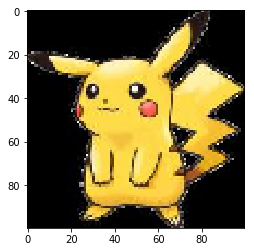

In [2]:
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
image = data[3951] #pikachu
# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### First change the background of all images to white

(6036, 100, 100, 3)
(6036, 100, 100, 3)


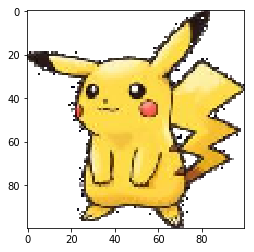

In [3]:
#read in data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')

print(data.shape)
image = data[20]

new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image[np.all(image <= [20, 20, 20], axis= 2)] = [255,255,255]
    new_images.append(image)

new_images = np.array(new_images)
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951] #pikachu

# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### Append horizotal flip images

(6036, 100, 100, 3)
(12072, 100, 100, 3)


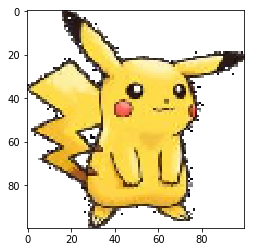

In [4]:
#read data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('poke96k.npy')
print(data.shape)
image = data[1000]

#Flip images horizontally 
new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image = image[:, ::-1]
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951+6036] #pikachu

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)


#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Change brightness 

(12072, 100, 100, 3)
(24144, 100, 100, 3)


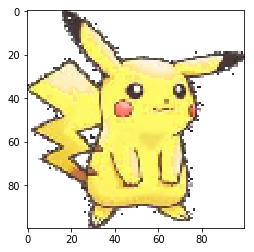

In [5]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load('poke96k.npy')
print(data.shape)
image = data[100]

brightness = 30
new_images = []
for i in range(data.shape[0]):
    image =np.copy(data[i])
    #apply brightness 
    image[image < [255-brightness,255-brightness,255-brightness]] += brightness
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951+6036*3]

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Crop images 3 different ways

(24144, 100, 100, 3)
(96576, 100, 100, 3)


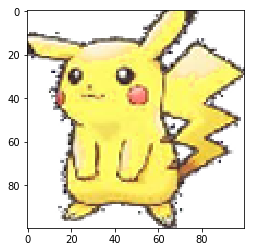

In [6]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")
print(data.shape)
image1 = data[8]
image2 = data[8]
image3 = data[8]

new_images1 = []
new_images2 = []
new_images3 = []
for i in range(data.shape[0]):
    image1 = np.copy(data[i])
    image2 = np.copy(data[i])
    image3 = np.copy(data[i])
    image1 = cv2.resize(image1[10:100,10:100:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    image2 = cv2.resize(image2[0:90,0:90:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    image3 = cv2.resize(image3[10:90,10:90:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    new_images1.append(image1)
    new_images2.append(image2)
    new_images3.append(image3)

new_images1 = np.array(new_images1)
new_images2 = np.array(new_images2)
new_images3 = np.array(new_images3)
new_images1 = np.vstack((data, new_images1, new_images2, new_images3))
print(new_images1.shape)   
np.save("poke96k.npy", new_images1)

image3 = new_images1[3951+6036*6]
# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
example_pic = Image.fromarray(image3, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels, labels, labels, labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Final results

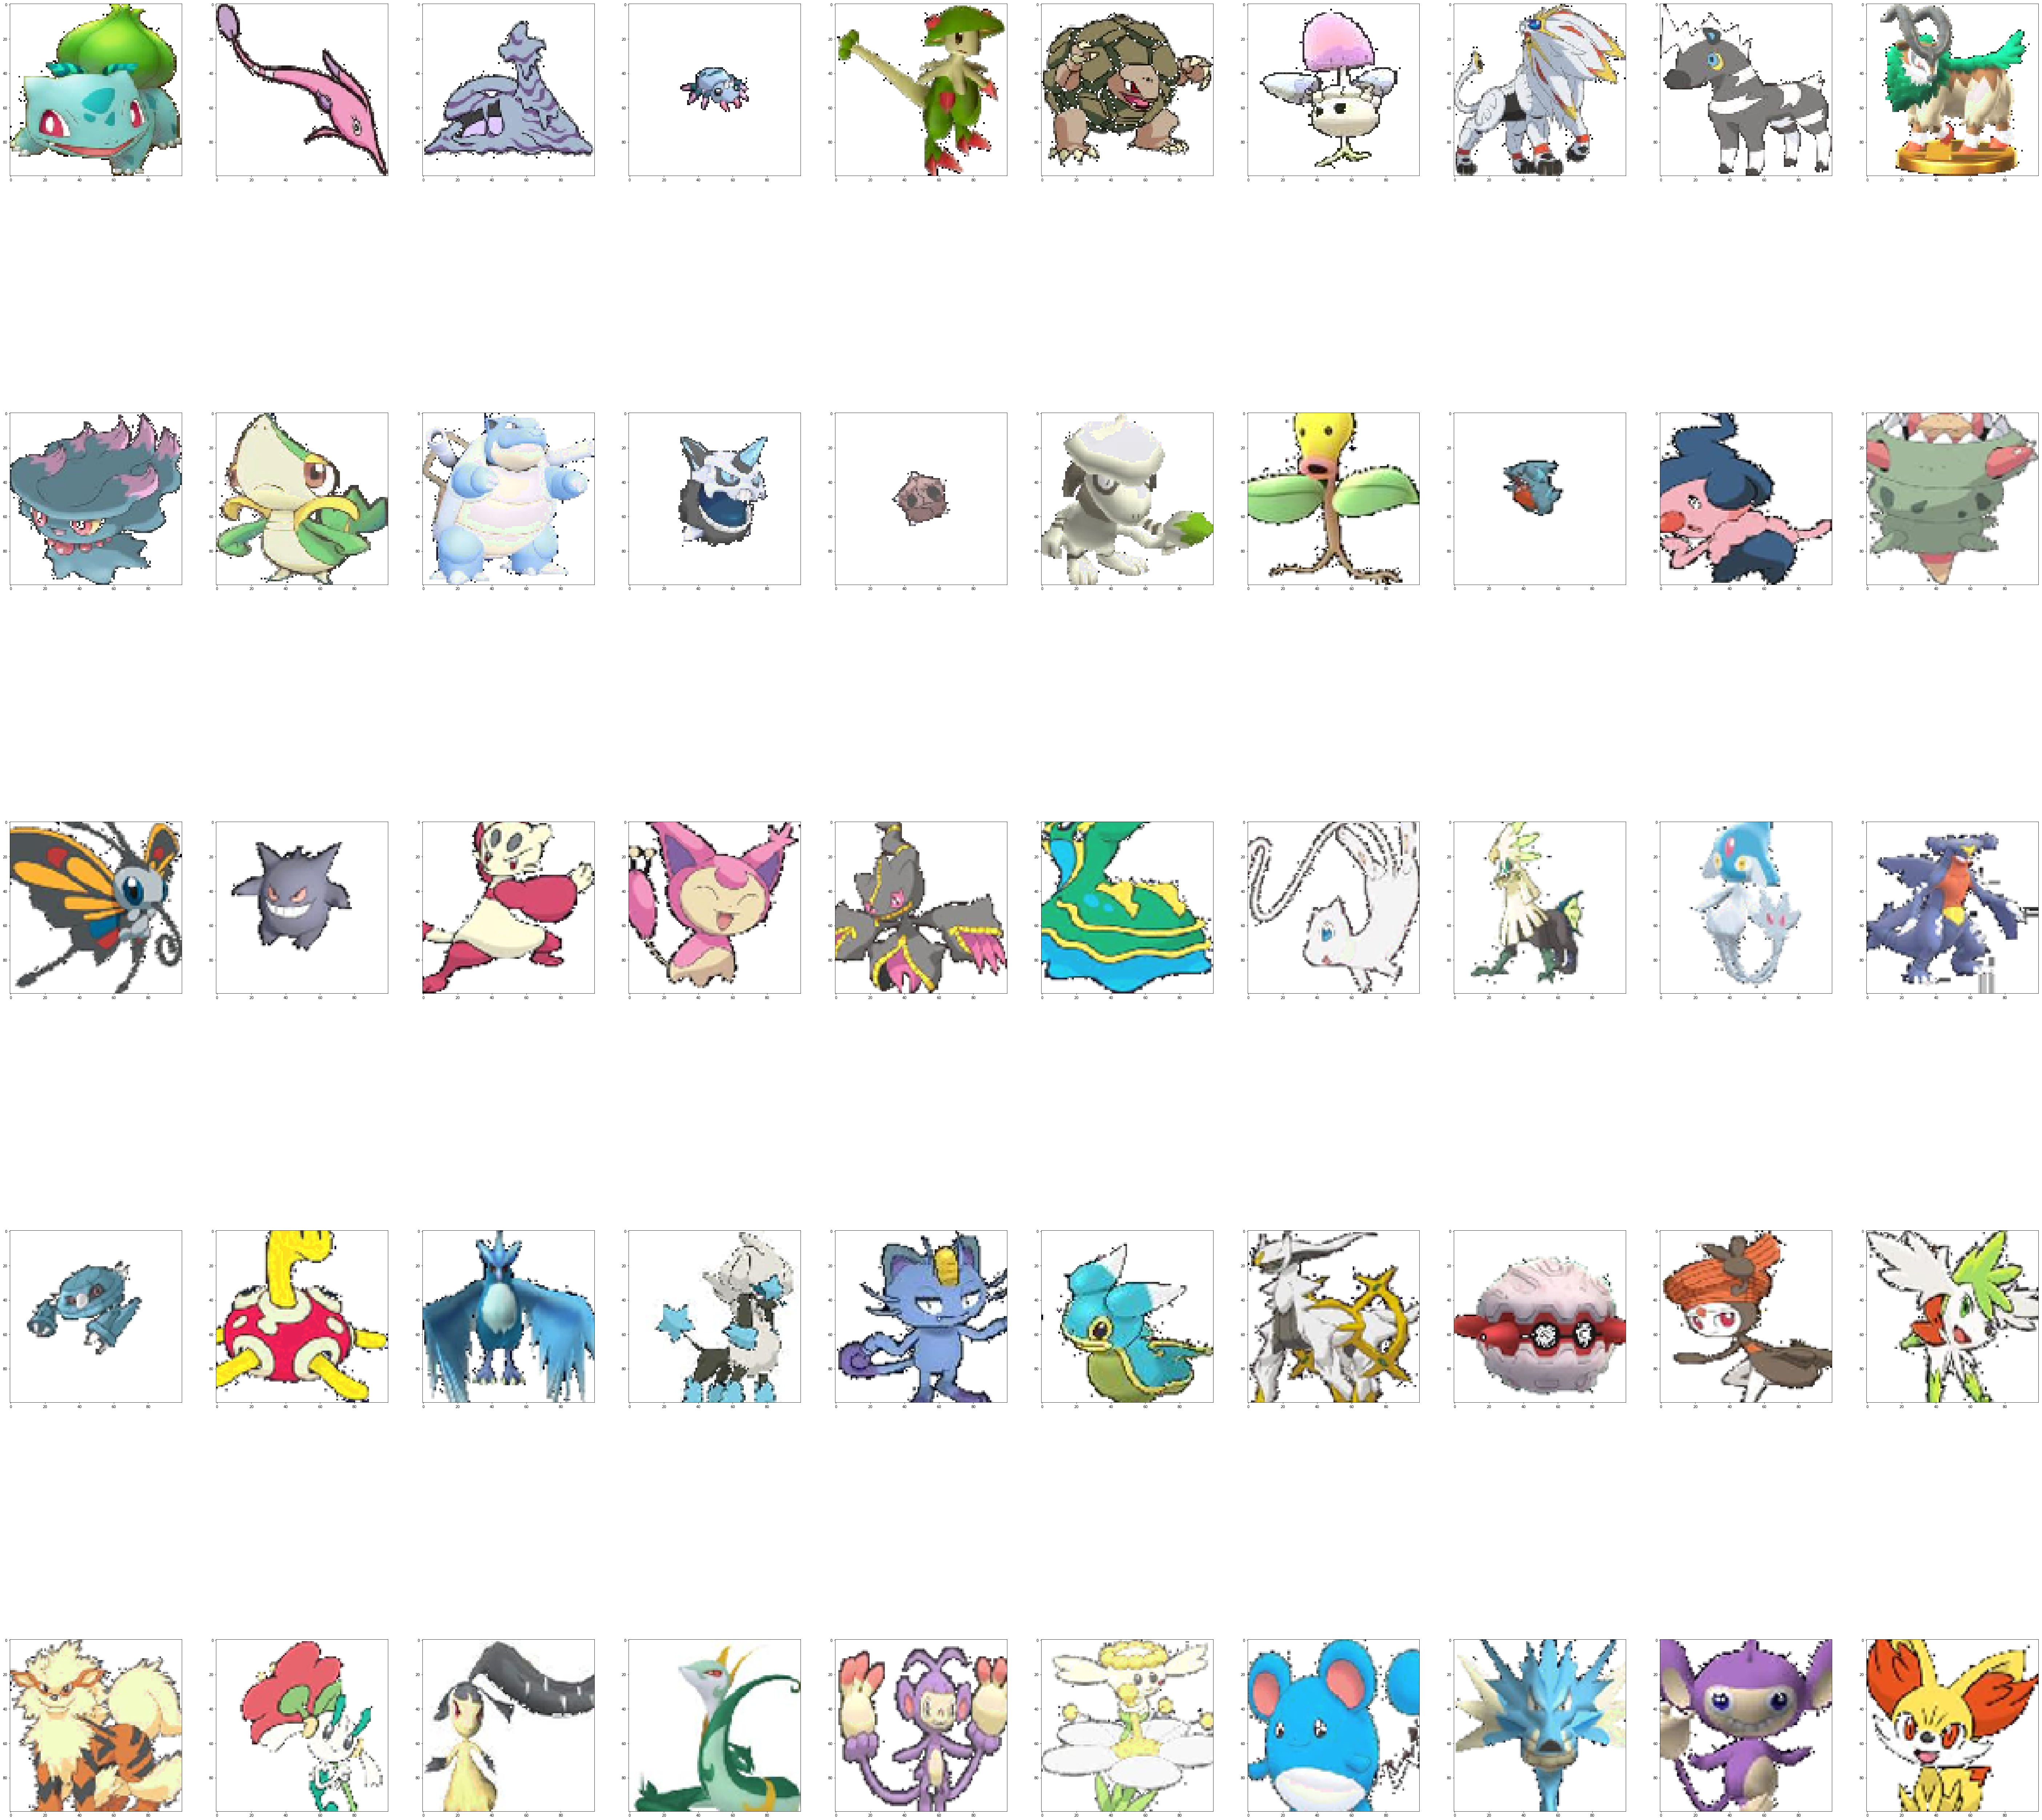

In [13]:

labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")


# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
# example_pic = Image.fromarray(image3, 'RGB')
# plt.imshow(example_pic)

#How do the labels look like? Example:
labels.iloc[3951+6036*6]

fig=plt.figure(figsize=(100, 100))
for i in range(0, 50):
    example_pic = Image.fromarray(data[i*1500+500], 'RGB')
    fig.add_subplot(5, 10, i+1)
    plt.imshow(example_pic)
    
plt.show()

## Nearest Neighbor
We will project our data onto a space and then use the nearest neighbor algorithm to see if we can classify distinct clusters as certain types.


In [ ]:
## code

## Logistic Regression 
We will use 1 vs all to train eighteen different logistic regression models with L2 regularization.  


In [ ]:
## code

## ConvNet
We will not develop our convolutional neural network from the ground up but instead use tensorflow with a gpu to speed up the training. 

[architecture](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=QwNmlfIC0YxM)


In [1]:
###Test for Tensorflow install 
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt



# # Load the fashion-mnist pre-shuffled train data and test data
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

,Name,Type 1,Type 2
0,Abomasnow,grass,ice
1,Abomasnow,grass,ice
2,Abomasnow,grass,ice
3,Abomasnow,grass,ice
4,Abomasnow,grass,ice


### Shuffle and split data set. 

In [14]:
#Warning need load of memory to execute 
# labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
# data = np.load("poke96k.npy")

# labels.head()

# dl = []
# for i in range(data.shape[0]):
#     dl.append([data[i],[labels.iat[i,0],labels.iat[i,1],labels.iat[i,2]]])
    
# data = None
# labels = None
# np.random.shuffle(dl)
# dl[0]

# dl = np.array(dl)
# dl.shape

# #split data 
# np.save("poke_train.npy", dl[0:60000])
# np.save("poke_valid.npy", dl[60000:80000])
# np.save("poke_test.npy", dl[80000:])


In [8]:
dl = np.load("poke_train.npy")

In [13]:
dl.shape
dl[0][1][0]

'Snorlax'

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 2


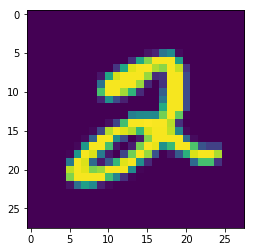

In [25]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# # Define the text labels
# fashion_mnist_labels = ["T-shirt/top",  # index 0
#                         "Trouser",      # index 1
#                         "Pullover",     # index 2 
#                         "Dress",        # index 3 
#                         "Coat",         # index 4
#                         "Sandal",       # index 5
#                         "Shirt",        # index 6 
#                         "Sneaker",      # index 7 
#                         "Bag",          # index 8 
#                         "Ankle boot"]   # index 9

# Define the text labels
fashion_mnist_labels = ['0','1','2','3','4','5','6','7','8','9']   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [27]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [28]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
x_valid, y_valid = x_test, y_test


checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
54848/55000 [============================>.] - ETA: 0s - loss: 0.3514 - acc: 0.8875
Epoch 00001: val_loss improved from inf to 0.07994, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3508 - acc: 0.8876 - val_loss: 0.0799 - val_acc: 0.9747
Epoch 2/10
54464/55000 [============================>.] - ETA: 0s - loss: 0.1363 - acc: 0.9573
Epoch 00002: val_loss improved from 0.07994 to 0.05608, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 5s 89us/sample - loss: 0.1358 - acc: 0.9573 - val_loss: 0.0561 - val_acc: 0.9820
Epoch 3/10
54464/55000 [============================>.] - ETA: 0s - loss: 0.1033 - acc: 0.9667
Epoch 00003: val_loss improved from 0.05608 to 0.04410, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 5s 88us/sample - loss: 0.1030 - acc: 0.9668 - val_loss: 0.0441 - val_acc: 0.98

In [31]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [32]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9911


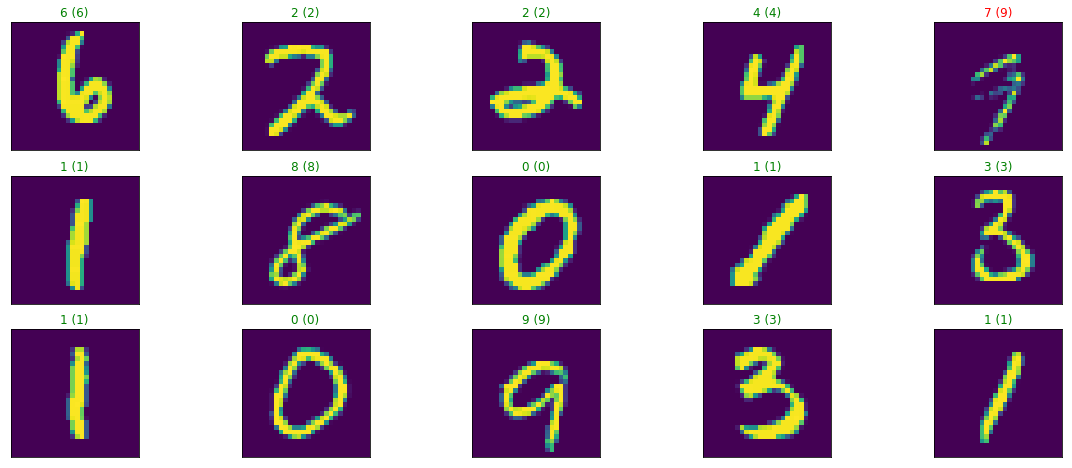

In [33]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))